In [18]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

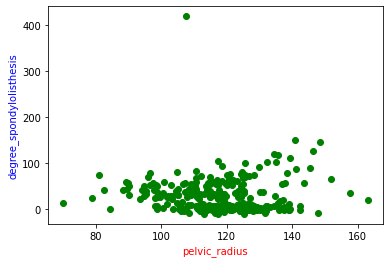

In [27]:
data = pd.read_csv('column_2C_weka.csv')
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'],c='g')
plt.xlabel('pelvic_radius',c='r')
plt.ylabel('degree_spondylolisthesis',c='b')
plt.show()

In [38]:
data.shape

(310, 7)

In [39]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [40]:
data.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

# Kmean clustering

In [33]:
data2 = data.loc[:,['degree_spondylolisthesis','pelvic_radius']]

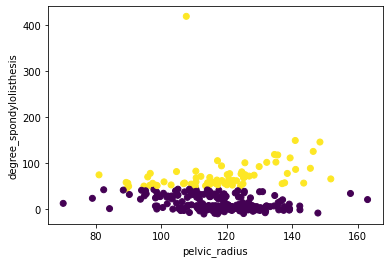

In [36]:
from sklearn.cluster import  KMeans
KM = KMeans(n_clusters = 2)
KM.fit(data2)
labels = KM.predict(data2)
plt.scatter(data2['pelvic_radius'],data['degree_spondylolisthesis'],c=labels)
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

In [37]:
# Cross tabulation table 
df = pd.DataFrame({'labels':labels,'class':data['class']})
CT = pd.crosstab(df['labels'],df['class'])
print(CT)

class   Abnormal  Normal
labels                  
0            138     100
1             72       0


In [56]:
# using Elbow method 

inertia = []
 
for i in range(1,8):
  KM = KMeans(n_clusters=i)
  KM.fit(data2)
  inertia.append(KM.inertia_)

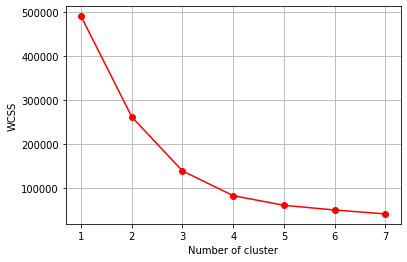

In [59]:
# plot the graph
plt.plot(range(1,8),inertia,'-o',color='red')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
sns.set_style('dark')
plt.grid()
plt.show()